In [34]:
## Imports for Classification
import os
os.chdir(os.path.abspath(''))
import xlrd
import importlib_resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as lm
from sklearn.metrics import confusion_matrix, accuracy_score

## Regression Part A

### 
Explain what variable is predicted based on which other variables and what
you hope to accomplish by the regression. Mention your feature transformation
choices such as one-of-K coding. Since we will use regularization momentarily,
apply a feature transformation to your data matrix X such that each column
has mean 0 and standard deviation 13.
###
Introduce a regularization parameter λ as discussed in chapter 14 of the lecture
notes, and estimate the generalization error for different values of λ. Specifi-
cally, choose a reasonable range of values of λ (ideally one where the general-
ization error first drop and then increases), and for each value use K = 10 fold
cross-validation (algorithm 5) to estimate the generalization error.
Include a figure of the estimated generalization error as a function of λ in the
report and briefly discuss the result.
### 
Explain how the output, y, of the linear model with the lowest generalization
error (as determined in the previous question) is computed for a given input
x. What is the effect of an individual attribute in x on the output, y, of the
linear model? Does the effect of individual attributes make sense based on your
understanding of the problem?

In [ ]:
#Lets use other features to predict Excentricity

#We have to do feature transformation now


## Classification


### Dataset Processing and Question 1

We have choosen to work on species classification, which is a straighforward binary classification. Each entry can be either "Besni" or "Kecimen". The 'Class' column within the dataset serves as the target variable.

In [35]:
filename = 'Raisin_Dataset.xls'
doc = xlrd.open_workbook(filename).sheet_by_index(0)

attributeNames = doc.row_values(0, 0, 7)

classLabels = doc.col_values(7, 1, 901)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

# Preallocate memory, then extract excel data to matrix X
X = np.empty((900, 7))
for i, col_id in enumerate(range(0, 7)):
    X[:, i] = np.asarray(doc.col_values(col_id, 1, 901))

# Compute values of N, M and C
N = len(y)
M = len(attributeNames)
C = len(classNames)

print(f'matrix size: {N} by {M}')
print(attributeNames)
print(classNames)

# Prepare the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape,X_test.shape, y_train.shape[0], y_test.shape[0])

matrix size: 900 by 7
['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
['Besni', 'Kecimen']
(720, 7) (180, 7) 720 180



Overall misclassification rate: 0.146


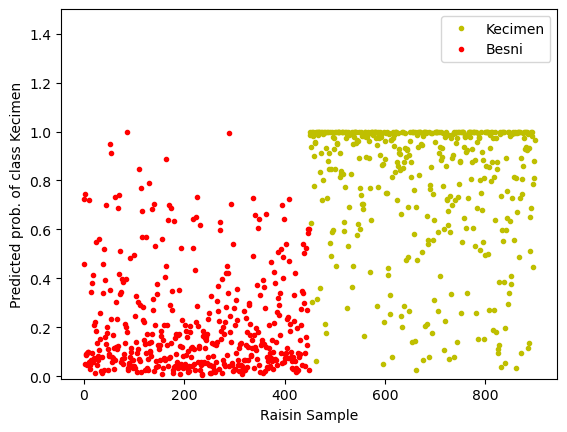

In [36]:
# Fit logistic regression model
model = lm.LogisticRegression()
model = model.fit(X, y)
# Classify Raisin as Kecimen/Besni (0/1) and assess probabilities
y_est = model.predict(X)
y_est_Kecimen_prob = model.predict_proba(X)[:, 0]

# Test: Define a new data object
x = np.array([6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31]).reshape(1, -1)
# Evaluate the probability of x being a Kecimen (class=0)
x_class = model.predict_proba(x)[0, 0]
#print("\nProbability of given sample being a Kecimen: {0:.4f}".format(x_class))

# Evaluate classifier's misclassification rate over entire training data
misclass_rate = np.sum(y_est != y) / float(len(y_est))
# Display classification results
print("\nOverall misclassification rate: {0:.3f}".format(misclass_rate))

f = plt.figure()
class0_ids = np.nonzero(y == 0)[0].tolist()
plt.plot(class0_ids, y_est_Kecimen_prob[class0_ids], ".y")
class1_ids = np.nonzero(y == 1)[0].tolist()
plt.plot(class1_ids, y_est_Kecimen_prob[class1_ids], ".r")
plt.xlabel("Raisin Sample")
plt.ylabel("Predicted prob. of class Kecimen")
plt.legend(["Kecimen", "Besni"])
plt.ylim(-0.01, 1.5)
plt.show()

### Question 2: 

The three methods we will compare is a baseline, logistic regression, and method2.
We selected method2 as KNN (k-nearest neighbor classification), complexity controlling parameter k = 1, 2 . . .

We are controlling the number of neighbors k for knn and C (lambda) for the logistic regression.

The possible values of the parameters is every time a range.

#### Logistic Regression

We are using here sklearn.GridSearchCV to find optimal hyperparameters for each model.

By providing the model to tune, here a logistic regression and a parameter array (or grid if multiple combinations are possible), GridSearchCV will train the model quickly for each parameters and evaluate Cross-Validation. 

The best parameters can be outputted, and the fitted model can be used for predictions.

In [37]:
## Logistic Regression with GridSearchCV

# Params
logistic = lm.LogisticRegression(max_iter=1000)
params = {'C': np.arange(0.02, 0.3, 0.02)} #hyperparams grid

# GridSearchCV to find optimal C value (being lambda for logistic reg)
gridsearchoutput = GridSearchCV(logistic, params, cv=10)
gridsearchoutput.fit(X_train, y_train)
print(gridsearchoutput.best_params_) #Fitted Param
print(gridsearchoutput.best_score_) #Best CrossValidation Score

{'C': 0.13999999999999999}
0.8638888888888889


#### KNN

In [38]:
## KNN - Method 2

# Preparation and definition of parameter grid for KNN
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 20))}
# GridSearchCV to find optimal k value, number of neighbors
gridsearchoutput2 = GridSearchCV(knn, params, cv=10)
gridsearchoutput2.fit(X_train, y_train)
print(gridsearchoutput2.best_params_) #Fitted Param
print(gridsearchoutput2.best_score_) #Best CrossValidation Score

{'n_neighbors': 8}
0.836111111111111


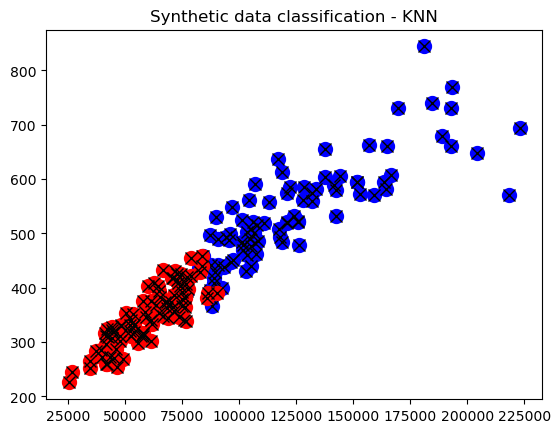

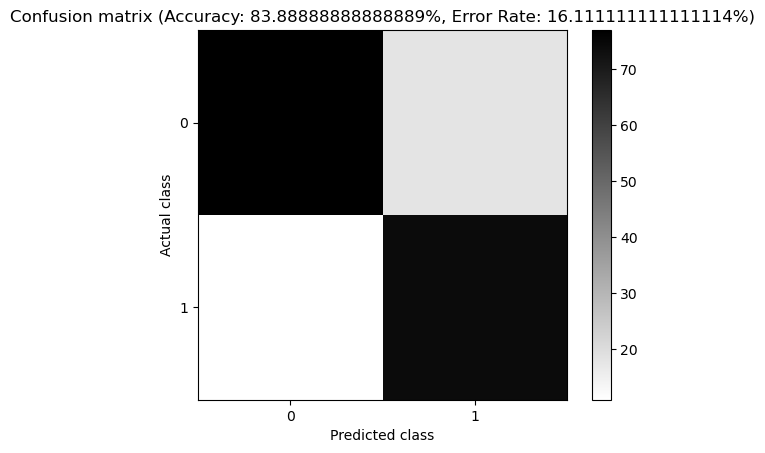

In [39]:
# K-nearest neighbors parameter
K = 13

#params
dist = 2
metric = "minkowski"
metric_params = {} 

knear = KNeighborsClassifier(
    n_neighbors=K, p=dist, metric=metric, metric_params=metric_params
)
knear.fit(X_train, y_train)
y_est = knear.predict(X_test)

# Plot the classfication results
styles = ["ob", "or", "og", "oy"]
for c in range(C):
    class_mask = y_est == c
    plt.plot(X_test[class_mask, 0], X_test[class_mask, 1], styles[c], markersize=10)
    plt.plot(X_test[class_mask, 0], X_test[class_mask, 1], "kx", markersize=8)
plt.title("Synthetic data classification - KNN")
plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_est)
accuracy = 100 * cm.diagonal().sum() / cm.sum()
error_rate = 100 - accuracy
plt.figure(2)
plt.imshow(cm, cmap="binary", interpolation="None")
plt.colorbar()
plt.xticks(range(C))
plt.yticks(range(C))
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)".format(accuracy, error_rate))
plt.show()

#### Baseline

(From Guide) The baseline will be a model which compute the largest class on the training data, and predict everything in the test-data as belonging to that class (corresponding to the optimal prediction by a logistic regression model with a bias term and no features). 

In [40]:
##  Baseline Error

# Define the baseline error rate function
def baseline_error_rate(y_true, y_pred):
    return np.sum(y_pred != y_true) / len(y_true)

### Question 3:

Again use two-level cross-validation to create a table similar to Table 2, but
now comparing the logistic regression, method 2, and baseline. The table should
once more include the selected parameters, and as an error measure we will use
the error rate E. Once more, make sure to re-use the outer validation splits to admit statistical evaluation. Briefly discuss the result

In [41]:
#Setup for cross-validation
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1) 
outer_results = []

In [42]:
outer_results = []
# GridSearchCV for Logistic Regression and KNN at the same time
for i, (train_index, test_index) in enumerate(outer_cv.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Logistic Regression with GridSearch
    log_reg = lm.LogisticRegression(max_iter=1000)
    param_grid_log_reg = {'C': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18]}
    grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
    grid_search_log_reg.fit(X_train, y_train)
    # KNN with GridSearch
    knn = KNeighborsClassifier()
    param_grid_knn = {'n_neighbors': list(range(1, 15))}
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
    grid_search_knn.fit(X_train, y_train)

    #Evaluation logreg and knn
    best_log_reg = grid_search_log_reg.best_estimator_
    best_log_reg.fit(X_train, y_train)
    y_pred_log_reg = best_log_reg.predict(X_test)
    
    best_knn = grid_search_knn.best_estimator_
    best_knn.fit(X_train, y_train)
    y_pred_knn = best_knn.predict(X_test)

    #Evaluation Baseline
    unique_values, counts = np.unique(y_train, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_value = unique_values[most_common_index]
    baseline_pred = np.full_like(y_test, most_common_value)
    
    # Error rates
    error_rate_log_reg = baseline_error_rate(y_test, y_pred_log_reg)
    error_rate_knn = baseline_error_rate(y_test, y_pred_knn)
    error_rate_baseline = baseline_error_rate(y_test, baseline_pred)
    
    #Results
    outer_results.append({
        'Outer_Fold': i,
        'Knn_k_Param': grid_search_knn.best_params_['n_neighbors'],
        'Knn_Error': error_rate_knn * 100,
        'LogReg_C_Param': grid_search_log_reg.best_params_['C'],
        'LogReg_Error': error_rate_log_reg * 100,
        'Baseline_Error': error_rate_baseline * 100
    })

#Display
results_panda = pd.DataFrame(outer_results) #Using Panda Dataframe to print
print(results_panda)
print(results_panda['LogReg_C_Param'])

   Outer_Fold  Knn_k_Param  Knn_Error  LogReg_C_Param  LogReg_Error  \
0           1           10  20.000000            0.02     16.666667   
1           2           10  11.111111            0.18      8.888889   
2           3            8  18.888889            0.14     11.111111   
3           4            5  16.666667            0.04     18.888889   
4           5            5  10.000000            0.14     11.111111   
5           6            8  21.111111            0.02     17.777778   
6           7           10  20.000000            0.02     14.444444   
7           8            7  18.888889            0.06     12.222222   
8           9            6  20.000000            0.02     18.888889   
9          10           12  12.222222            0.16     13.333333   

   Baseline_Error  
0       54.444444  
1       51.111111  
2       50.000000  
3       54.444444  
4       52.222222  
5       52.222222  
6       56.666667  
7       50.000000  
8       60.000000  
9       50.000000 

In [43]:
print(results_panda['LogReg_Error'])

0    16.666667
1     8.888889
2    11.111111
3    18.888889
4    11.111111
5    17.777778
6    14.444444
7    12.222222
8    18.888889
9    13.333333
Name: LogReg_Error, dtype: float64


### Question 4:

Perform a statistical evaluation of your three models similar to the previous
section. That is, compare the three models pairwise.
Include p-values and confidence intervals for the three pairwise tests in your
report and conclude on the results: Is one model better than the other? Are
the two models better than the baseline? Are some of the models identical?
What recommendations would you make based on what you’ve learned?

Method 11.4.1: Correlated t-test for cross-validation

In [44]:
# LogReg vs KNN
t_lr_knn, p_lr_knn = stats.ttest_rel(results_panda['LogReg_Error'], results_panda['Knn_Error'])
cin_lr_knn = stats.t.interval(0.95, len(results_panda['LogReg_Error'])-1, loc=np.mean(results_panda['LogReg_Error']-results_panda['Knn_Error']), scale=stats.sem(results_panda['LogReg_Error']-results_panda['Knn_Error']))
print(f"LR - KNN: p = {p_lr_knn}, CI = {cin_lr_knn}")
# LogReg vs Baseline
t_lr_baseline, p_lr_baseline = stats.ttest_rel(results_panda['LogReg_Error'], results_panda['Baseline_Error'])
cin_lr_baseline = stats.t.interval(0.95, len(results_panda['LogReg_Error'])-1, loc=np.mean(results_panda['LogReg_Error']-results_panda['Baseline_Error']), scale=stats.sem(results_panda['LogReg_Error']-results_panda['Baseline_Error']))
print(f"LR - Baseline: p = {p_lr_baseline}, CI = {cin_lr_baseline}")
#LKNN vs Baseline
t_knn_baseline, p_knn_baseline = stats.ttest_rel(results_panda['Knn_Error'], results_panda['Baseline_Error'])
cin_knn_baseline = stats.t.interval(0.95, len(results_panda['Knn_Error'])-1, loc=np.mean(results_panda['Knn_Error']-results_panda['Baseline_Error']), scale=stats.sem(results_panda['Knn_Error']-results_panda['Baseline_Error']))
print(f"KNN - Baseline: p = {p_knn_baseline}, CI = {cin_knn_baseline}")

LR - KNN: p = 0.043197828491207346, CI = (-5.014001059006846, -0.0971100521042656)
LR - Baseline: p = 8.261809765936822e-12, CI = (-40.77632835389654, -36.77922720165902)
KNN - Baseline: p = 4.661124630437513e-10, CI = (-39.15345102100499, -33.29099342343945)


### Question 5:

Train a logistic regression model using a suitable value of λ (see previous exercise). Explain how the logistic regression model make a prediction. Are the same features deemed relevant as for the regression part of the report?

<AxesSubplot:ylabel='Feature'>

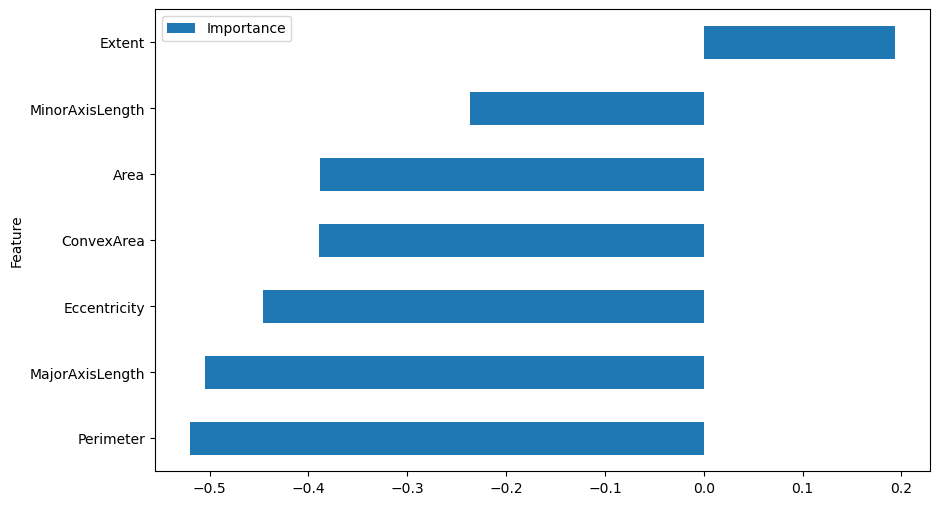

In [51]:
outer_results = []
scaler = StandardScaler()


# Train the logistic regression model using the best value of λ
for i, (train_index, test_index) in enumerate(outer_cv.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    log_reg = lm.LogisticRegression(max_iter=1000)
    param_grid_log_reg = {'C': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18]}
    grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
    grid_search_log_reg.fit(X_train, y_train)
    
    best_log_reg = grid_search_log_reg.best_estimator_
    y_pred_log_reg = best_log_reg.predict(X_test)
    
    error_rate_log_reg = baseline_error_rate(y_test, y_pred_log_reg)
    
    outer_results.append({
        'Outer_Fold': i,
        'LogReg_C_param': grid_search_log_reg.best_params_['C'],
        'LogReg_Error': error_rate_log_reg * 100,
    })

#Feature importance 
featureimp = pd.DataFrame(data={'Feature': attributeNames, 'Importance': best_log_reg.coef_[0]})
featureimp = featureimp.sort_values('Importance', ascending=True)
featureimp.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))